In [78]:
import pandas as pd
from db import Database

In [79]:
train = pd.read_csv("Database.csv")
train.head()

,Unnamed: 0,page,idx,year,material,tool,area,st_price,final_price,auction_year,auction_month,auction_date
0,0,0,0,NaN,paper,gouache and colored pencil,784.00,15000000.0,40000000.0,2021,9,28
1,1,0,1,1961.0,paper,gouache,1056.25,120000000.0,NaN,2021,9,28
2,2,0,2,1968.0,newspaper,color,3058.09,80000000.0,105000000.0,2021,9,28
3,3,0,3,1971.0,Korean paper,oil,3192.25,80000000.0,135000000.0,2021,9,28
4,4,0,4,1963.0,paper,gouache and pen,299.29,20000000.0,20000000.0,2021,9,9


In [80]:
len(train)

428

In [81]:
train.final_price.describe()

count    3.010000e+02
mean     4.502131e+08
std      1.057504e+09
min      3.600000e+06
25%      2.800000e+07
50%      9.111357e+07
75%      3.400000e+08
max      9.415069e+09
Name: final_price, dtype: float64

In [82]:
train.isnull().sum()


Unnamed: 0         0
page               0
idx                0
year             129
material          14
tool               1
area               5
st_price          37
final_price      127
auction_year       0
auction_month      0
auction_date       0
dtype: int64

In [92]:
fails = train[train['final_price'].isnull()]

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = mpl.font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [ ]:
import seaborn as sns
from scipy import stats

figure, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,16)

sns.countplot(data=train, x="year", ax=ax1)
sns.countplot(data=train, x="auction_year", ax=ax2)

ax1.set(ylabel='Count',xlabel='year',title="작품년도")
ax2.set(xlabel='auction_year',title="경매년도")

In [ ]:
figure.savefig('savefig_default.png')

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(18, 18)

sns.boxplot(data=train,y="final_price",x="auction_year",orient="v",ax=axes[0])
sns.boxplot(data=train,y="final_price",x="year",orient="v",ax=axes[1])
sns.boxplot(data=train,y="area",x="year",orient="v",ax=axes[2])


axes[0].set(xlabel='auction year', ylabel='final price',title="년도별 낙찰가격")
axes[1].set(xlabel='year', ylabel='final price',title="작품년도별 낙찰가격")
axes[2].set(xlabel='year', ylabel='area',title="작품년도별 크기")



In [122]:
def auction_fail(data):
    if data['final_price']>0:
        return 'False'
    else:
        return 'True'

train['fail'] = train.apply(auction_fail, axis=1)
train[['fail','final_price']]




,fail,final_price
0,False,40000000.0
1,True,NaN
2,False,105000000.0
3,False,135000000.0
4,False,20000000.0
...,...,...
423,True,NaN
424,False,34000000.0
425,True,NaN
426,True,NaN


[Text(0.5, 0, '유찰'), Text(0, 0.5, 'count'), Text(0.5, 1.0, '유찰횟수')]

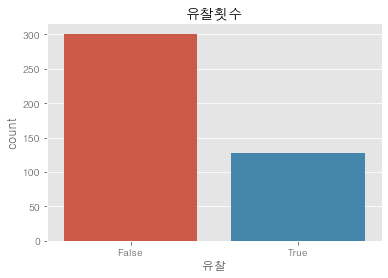

In [123]:
plt.subplot()
ax = sns.countplot(data=train, x='fail')
ax.set(xlabel='유찰', ylabel='count',title="유찰횟수")


In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18, 8)

sns.kdeplot(data=train,x="area")
sns.jointplot(data=train,y="area",x="year")

axes.set(xlabel='area',ylabel='dist',title="area 분포")


In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.lineplot(data=train,y="st_price",x="area",ax=axes[0])
sns.lineplot(data=train,y="final_price",x="area",ax=axes[1])

axes[0].set(xlabel='area',ylabel='start price',title="크기별 시초가격")
axes[1].set(xlabel='area',ylabel='final price',title="크기별 낙찰가격")


In [ ]:
sns.jointplot(data=train,y="st_price",x="area")
sns.jointplot(data=train,y="final_price",x="area")

In [ ]:
def concatenate_year_month(data):
    return "{0}-{1}".format(data['auction_year'], data['auction_month'])

train["year_month"] = train.apply(concatenate_year_month,axis=1)

print(train.shape)
train[["year_month"]].head()

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(36, 12)

sns.boxplot(data=train,y="st_price",x="year_month",orient="v",ax=axes[0])
sns.boxplot(data=train,y="final_price",x="year_month",orient="v",ax=axes[1])

axes[0].set(xlabel='auction time', ylabel='start price',title="시간별 시초가격")
axes[1].set(xlabel='auction time', ylabel='final price',title="시간별 낙찰가격")

In [ ]:
def price_rise(data):
    return data['final_price']-data['st_price']

def price_rise_rate(data):
    if data['st_price'] != 0:
        return (data['final_price']-data['st_price'])/data['st_price']
    else:
        return None

train["price_rise"] = train.apply(price_rise,axis=1)
train["price_rise_rate"] = train.apply(price_rise_rate,axis=1)
# train['price_rise'].head()
train['price_rise_rate'].head()

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.boxplot(data=train,y="price_rise",x="auction_year",orient="v",ax=axes[0])
sns.boxplot(data=train,y="price_rise_rate",x="auction_year",orient="v",ax=axes[1])

axes[0].set(xlabel='auction year', ylabel='price rise', title="년도별 낙찰가격상승",ylim=(-1,0.5e10))
axes[1].set(xlabel='auction year', ylabel='price rise rate',title="년도별 낙찰가격상승률",ylim=(-1,5))


In [ ]:
fig.savefig('savefig_년도별낙찰가격상승.png')

In [ ]:
def concatenate_year_month(data):
    return (data['auction_year']//10)*10

train["10year"] = train.apply(concatenate_year_month,axis=1)

print(train.shape)
train[["10year"]].head()

In [ ]:
def cal_period(data):
    return data['auction_year']-data['year']

train['period'] = train.apply(cal_period, axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.boxplot(data=train,y="price_rise",x="period",orient="v",ax=axes[0])
sns.boxplot(data=train,y="price_rise_rate",x="period",orient="v",ax=axes[1])

axes[0].set(xlabel='period', ylabel='price rise', title="기간별 낙찰가격상승",ylim=(-100,0.5e10))
axes[1].set(xlabel='period', ylabel='price rise rate',title="기간별 낙찰가격상승률",ylim=(-1,5))


In [ ]:
train.loc[train['period']>=63]

In [ ]:
def cal_period(data):
    return ((data['auction_year']-data['year'])//10)*10

train['period_10'] = train.apply(cal_period, axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.boxplot(data=train,y="price_rise",x="period_10",orient="v",ax=axes[0])
sns.boxplot(data=train,y="price_rise_rate",x="period_10",orient="v",ax=axes[1])

axes[0].set(xlabel='period', ylabel='price rise', title="기간별 낙찰가격상승",ylim=(0,0.5e10))
axes[1].set(xlabel='period', ylabel='price rise rate',title="기간별 낙찰가격상승률",ylim=(-1,5))


In [ ]:
train.sort_values(by=['price_rise_rate'],ascending=False)

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.boxplot(data=train,y="price_rise",x="10year",orient="v",ax=axes[0])
sns.boxplot(data=train,y="price_rise_rate",x="10year",orient="v",ax=axes[1])

axes[0].set(xlabel='years', ylabel='price rise', title="시대별 낙찰가격상승",ylim=(0,0.5e10))
axes[1].set(xlabel='years', ylabel='price rise rate',title="시대별 낙찰가격상승률",ylim=(0,5))


In [ ]:
def concatenate_year_month(data):
    return (data['auction_year']//5)*5

train["5year"] = train.apply(concatenate_year_month,axis=1)

print(train.shape)
train[["5year"]].head()

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(18, 16)

sns.boxplot(data=train,y="price_rise",x="5year",orient="v",ax=axes[0])
sns.boxplot(data=train,y="price_rise_rate",x="5year",orient="v",ax=axes[1])

axes[0].set(xlabel='years', ylabel='price rise', title="시대별 낙찰가격상승",ylim=(0,0.5e10))
axes[1].set(xlabel='years', ylabel='price rise rate',title="시대별 낙찰가격상승률",ylim=(0,5))


In [ ]:
fig.savefig('savefig_default.png')

In [ ]:
train.columns

In [ ]:
corr_train = train[['area','st_price','final_price','price_rise','year','price_rise_rate','period']]
corr_train.head()
sns.heatmap(corr_train.corr(),annot=True)

In [ ]:
sns.scatterplot(data=train,y="price_rise_rate",x="area",hue='period_10')
train[train['price_rise_rate']>5]

In [ ]:
train[['area','year','auction_year','period','st_price','final_price','price_rise','price_rise_rate']].sort_values('area')